# 12 Visualizing Geological Cross Sections with PyVista

Geological Cross Sections obtained from Geological Maps can be loaded and plotted with PyVista in GemGIS. The following illustrates how to get data from a Geological Map into GemGIS.

## Data Preparation

The data used for GemGIS is obtained from [OpenDataNRW](#https://www.opengeodata.nrw.de/produkte/geologie/geologie/GK/ISGK100/GK100analog/). It will be used under Datenlizenz Deutschland – Namensnennung – Version 2.0 (https://www.govdata.de/dl-de/by-2-0) with © Geowissenschaftliche Daten: Analoges Kartenwerk der Geologischen Karte von Nordrhein-Westfalen 1:100.000 (2020).

### Geological Maps
For the visualization of cross sections, the geological maps ``Münster`` and ``Rheine`` were taken as shown below.

<img src="../images/geological_maps.png">

### Geological Cross Section
From these maps, the geological cross sections were extracted with an image editing software, tilted so that they are completely horizontal and cropped to the extent of the cross section. The axes were also cut off.

<img src="../images/profile1.jpg">
<img src="../images/profile2.jpg">

### Traces of Geological Cross Sections

In order to locate the cross sections in space, the traces of the profiles need to be digitized and the vertical ranges of the cross sections need to be provided as attributes of the shape file. This can be done for example in QGIS.

<img src="../images/traces.PNG">

<img src="../images/table.PNG">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/12_visualizing_cross_sections_in_pyvista/'

## Loading Data

The traces were saved as shape file and are now loaded as GeoDataFrame using GeoPandas.

In [2]:
import geopandas as gpd
import gemgis as gg

traces = gpd.read_file(file_path + 'traces.shp')
traces

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,id,zmax,zmin,name,geometry
0,None,500,-6000,Muenster,"LINESTRING (32386148.890 5763304.720, 32393549..."
1,None,500,-2000,Rheine,"LINESTRING (32402275.136 5761828.501, 32431165..."


## Create Mesh for one cross section

A mesh can be created based on the LineStrings and the provided vertical extent using the function ``create_mesh_cross_section(..)``.

In [3]:
mesh = gg.visualization.create_mesh_from_cross_section(linestring=traces.loc[0].geometry,
                                           zmin=traces.loc[0]['zmin'],
                                           zmax=traces.loc[0]['zmax'])

mesh

PolyData (0x29bbb8de100)
  N Cells:	20
  N Points:	22
  X Bounds:	3.239e+07, 3.242e+07
  Y Bounds:	5.717e+06, 5.763e+06
  Z Bounds:	-6.000e+03, 5.000e+02
  N Arrays:	1

In [4]:
type(mesh)

pyvista.core.pointset.PolyData

### Plotting Mesh

The mesh can now be plotted using PyVista. A new PyVista plotter is created. The cross section is correctly placed in space.

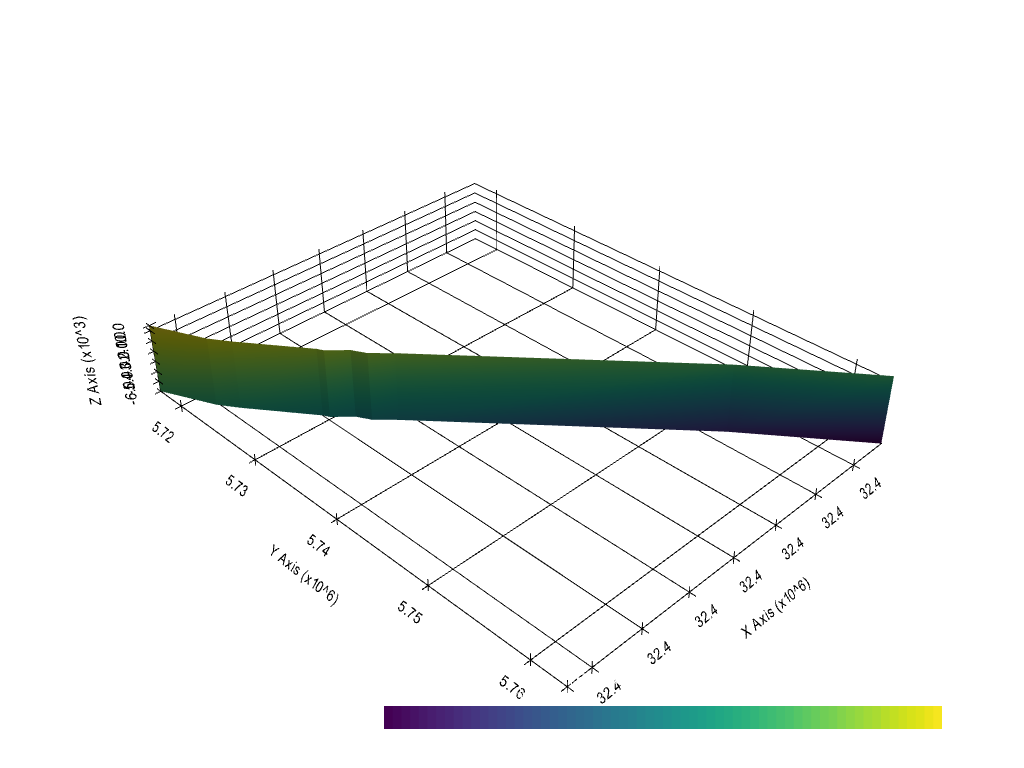

In [5]:
import pyvista as pv

p = pv.Plotter()

p.add_mesh(mesh)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

### Adding texture to mesh

A texture can be applied to the mesh. In this case, the image data of the cross section is used to drape it over the mesh.

In [6]:
import rasterio

texture = rasterio.open(file_path + 'profile1.png')

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\rasterio\__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


#### Plotting texture

The loaded image file contains the data of the cross section.

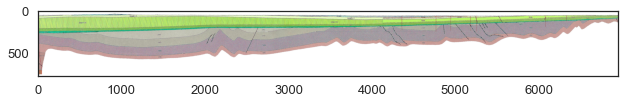

In [7]:
from rasterio.plot import show

show(texture);

#### Adding texture to mesh

A PyVista texture will be created and passed to the ``add_mesh(...)`` function as shown below to drape the image data over the mesh.

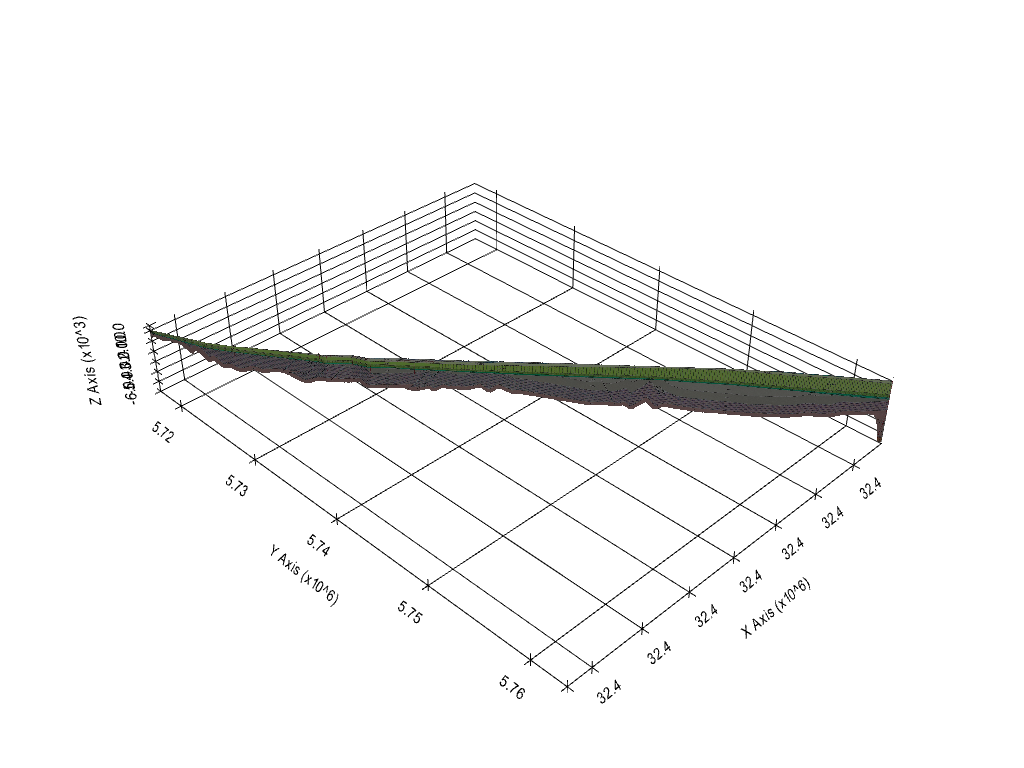

In [8]:
tex = pv.Texture(file_path + 'profile1.png')

import pyvista as pv

p = pv.Plotter()

p.add_mesh(mesh, texture=tex)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Creating Meshes for multiple cross sections

The functionality for one cross section can be extended to multiple cross sections. In this case, we are passing the entire GeoDataFrame containing the traces to the function ``create_meshes_from_cross_sections(..)``. The result is a list of PyVista PolyData sets.


In [16]:
meshes = gg.visualization.create_meshes_from_cross_sections(gdf=traces)
meshes

[PolyData (0x29bf33dc3a0)
   N Cells:	20
   N Points:	22
   X Bounds:	3.239e+07, 3.242e+07
   Y Bounds:	5.717e+06, 5.763e+06
   Z Bounds:	-6.000e+03, 5.000e+02
   N Arrays:	1,
 PolyData (0x29bf3ae5ca0)
   N Cells:	2
   N Points:	4
   X Bounds:	3.240e+07, 3.243e+07
   Y Bounds:	5.762e+06, 5.814e+06
   Z Bounds:	-2.000e+03, 5.000e+02
   N Arrays:	1]

### Plotting Meshes

The meshes can now be plotted using PyVista. A new PyVista plotter is created. The cross sections are correctly placed in space.

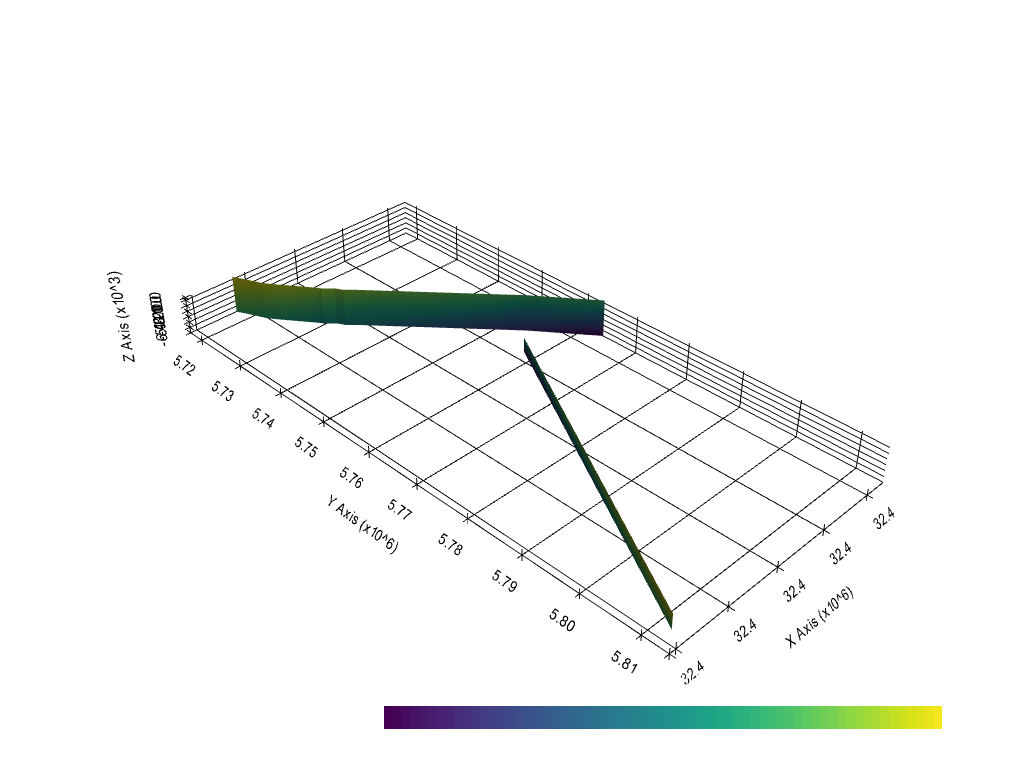

In [17]:
import pyvista as pv

p = pv.Plotter()

for i in range(len(meshes)):
    p.add_mesh(meshes[i])

p.show_grid(color='black')
p.set_background(color='white')
p.show()

### Adding Texture to Meshes

As for the previous example, the textures are loaded via the path of the image files. Therefore, the function ``create_file_paths`` is used to create a list of file paths.

**NB: The order of the traces in the passed GeoDataFrame must be identical to the order of the loaded images!**

In [20]:
source_files = gg.misc.create_filepaths(dirpath = file_path, search_criteria='profile*.png')
source_files

['../../../../gemgis_data/data/12_visualizing_cross_sections_in_pyvista\\profile1.png',
 '../../../../gemgis_data/data/12_visualizing_cross_sections_in_pyvista\\profile2.png']

A list of textures is then created from each source image file.

In [22]:
textures = [pv.Texture(file) for file in source_files]
textures

[(Texture)0000029BF95D28E0, (Texture)0000029BF3826940]

### Plotting Meshes with Textures

The cross sections are finally plotted at their true locations in space with the textures draped over them.

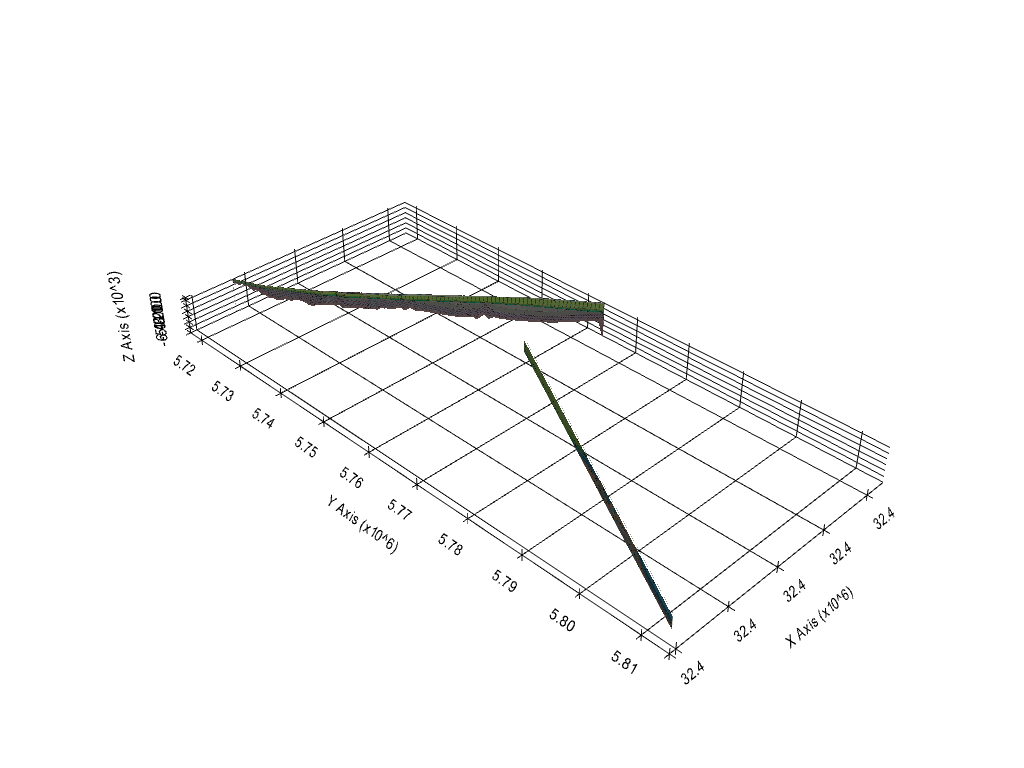

In [23]:
import pyvista as pv

p = pv.Plotter()

for i in range(len(meshes)):
    p.add_mesh(meshes[i], texture=textures[i])

p.show_grid(color='black')
p.set_background(color='white')
p.show()